In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import os
from data import CustomDataset
from models import trainer, CustomModel

from trains.models import LSTM


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print('Device:', device)

data_origin = pd.read_csv("../trains/Dataset.csv")

Device: cuda


In [13]:
def sliding_windows(data, seq_length):
    x = []
    y = []
    print(len(data)-seq_length-1)
    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data_origin.iloc[i+seq_length, -1]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

seq_length = 5

In [14]:
data_value = data_origin.iloc[:, 0:6].values
x, y = sliding_windows(data_value, seq_length)

print(x.shape,y.shape)
print(x[0],y[0])
print(x[1],y[1])

27989
(27989, 5, 6) (27989,)
[[-2544 14340 -6864  3840  -335 -1518]
 [-2380 14188 -5644  3888  1635 -9604]
 [ -524 14480 -7148  3888 -1663 -1491]
 [ -528 15052 -6672  3904   461 -4012]
 [-2808 14040 -5936  3904   595  -339]] 1
[[-2380 14188 -5644  3888  1635 -9604]
 [ -524 14480 -7148  3888 -1663 -1491]
 [ -528 15052 -6672  3904   461 -4012]
 [-2808 14040 -5936  3904   595  -339]
 [  152 14872 -6996  3936   704   984]] 1


# Train data, Test data 나누기

In [23]:
train_size = int((3 / 4) * len(y))
test_size = len(y) - train_size

X_data = torch.Tensor(np.array(x))
Y_data = torch.Tensor(np.array(y))
X_data = X_data.to(device)
Y_data = Y_data.to(device)

X_train = torch.Tensor(np.array(x[0:train_size])).to(device)
Y_train = torch.Tensor(np.array(y[0:train_size])).to(device)

X_test = torch.Tensor(np.array(x[train_size:len(x)])).to(device)
Y_test = torch.Tensor(np.array(y[train_size:len(y)])).to(device)

In [24]:
train_dataset = CustomDataset(X_train, Y_train)
train_data_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


valid_dataset = CustomDataset(X_test, Y_test)
valid_data_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)

In [25]:
datalodder_dcit = {"train" : train_data_loader, "valid" : valid_data_loader}

In [26]:
input_size = 6
hidden_size = 128
num_layers = 1
num_classes = 1

num_epochs = 1000
learning_rate = 1e-4

In [27]:

lstm = LSTM(num_classes, input_size, hidden_size, num_layers, device)
lstm = lstm.to(device)

loss_function = torch.nn.BCELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

In [28]:
x_histry, y_history =trainer(lstm, 1000, datalodder_dcit, optimizer, loss_function, 10, device)


100%|██████████| 110/110 [00:00<00:00, 1309.53it/s]


0.5875264305567973 0.5648255952805129
Epoch: 01 | Epoch Time: 0m 0s
	Train Loss: 0.565
	 Valid. Loss: 0.588


100%|██████████| 110/110 [00:00<00:00, 1309.49it/s]


0.5276425946963567 0.41526581464329404
Epoch: 02 | Epoch Time: 0m 0s
	Train Loss: 0.415
	 Valid. Loss: 0.528


100%|██████████| 110/110 [00:00<00:00, 1387.15it/s]


0.4788024596858483 0.30914939135611574
Epoch: 03 | Epoch Time: 0m 0s
	Train Loss: 0.309
	 Valid. Loss: 0.479


100%|██████████| 110/110 [00:00<00:00, 1235.99it/s]


0.4314057395502286 0.23660298995799423
Epoch: 04 | Epoch Time: 0m 0s
	Train Loss: 0.237
	 Valid. Loss: 0.431


100%|██████████| 110/110 [00:00<00:00, 1441.90it/s]


0.40695699051956236 0.1874044703845064
Epoch: 05 | Epoch Time: 0m 0s
	Train Loss: 0.187
	 Valid. Loss: 0.407


100%|██████████| 110/110 [00:00<00:00, 1078.42it/s]


0.39058756854885396 0.1541901772332038
Epoch: 06 | Epoch Time: 0m 0s
	Train Loss: 0.154
	 Valid. Loss: 0.391


100%|██████████| 110/110 [00:00<00:00, 1486.50it/s]


0.37927645244658953 0.1296143519906301
Epoch: 07 | Epoch Time: 0m 0s
	Train Loss: 0.130
	 Valid. Loss: 0.379


100%|██████████| 110/110 [00:00<00:00, 1486.51it/s]


0.3741941389187427 0.1122792285436511
Epoch: 08 | Epoch Time: 0m 0s
	Train Loss: 0.112
	 Valid. Loss: 0.374


100%|██████████| 110/110 [00:00<00:00, 1466.67it/s]


0.3562537142112848 0.09924038811596704
Epoch: 09 | Epoch Time: 0m 0s
	Train Loss: 0.099
	 Valid. Loss: 0.356


100%|██████████| 110/110 [00:00<00:00, 1447.33it/s]


0.36661396983539196 0.09011407775220526
Epoch: 10 | Epoch Time: 0m 0s
	Train Loss: 0.090
	 Valid. Loss: 0.367


100%|██████████| 110/110 [00:00<00:00, 1428.58it/s]


0.36626034802704455 0.08384552969208604
Epoch: 11 | Epoch Time: 0m 0s
	Train Loss: 0.084
	 Valid. Loss: 0.366


100%|██████████| 110/110 [00:00<00:00, 1341.45it/s]


0.37887587204065365 0.07768007446481422
Epoch: 12 | Epoch Time: 0m 0s
	Train Loss: 0.078
	 Valid. Loss: 0.379


100%|██████████| 110/110 [00:00<00:00, 1357.38it/s]


0.35571416327952887 0.06988309883293249
Epoch: 13 | Epoch Time: 0m 0s
	Train Loss: 0.070
	 Valid. Loss: 0.356


100%|██████████| 110/110 [00:00<00:00, 1374.95it/s]


0.35738912315647603 0.0646339084699727
Epoch: 14 | Epoch Time: 0m 0s
	Train Loss: 0.065
	 Valid. Loss: 0.357


100%|██████████| 110/110 [00:00<00:00, 1351.59it/s]


0.3593449548088519 0.0614355160509603
Epoch: 15 | Epoch Time: 0m 0s
	Train Loss: 0.061
	 Valid. Loss: 0.359


100%|██████████| 110/110 [00:00<00:00, 1264.35it/s]


0.3752247132249613 0.05885868980841453
Epoch: 16 | Epoch Time: 0m 0s
	Train Loss: 0.059
	 Valid. Loss: 0.375


100%|██████████| 110/110 [00:00<00:00, 1195.65it/s]


0.3432120186488557 0.05551950772667111
Epoch: 17 | Epoch Time: 0m 0s
	Train Loss: 0.056
	 Valid. Loss: 0.343


100%|██████████| 110/110 [00:00<00:00, 1564.84it/s]


0.38572193001505845 0.05342682854243612
Epoch: 18 | Epoch Time: 0m 0s
	Train Loss: 0.053
	 Valid. Loss: 0.386


100%|██████████| 110/110 [00:00<00:00, 1594.22it/s]


0.3588859121297086 0.050826658152013614
Epoch: 19 | Epoch Time: 0m 0s
	Train Loss: 0.051
	 Valid. Loss: 0.359


100%|██████████| 110/110 [00:00<00:00, 1428.65it/s]


0.34398060405352043 0.0486631971859961
Epoch: 20 | Epoch Time: 0m 0s
	Train Loss: 0.049
	 Valid. Loss: 0.344


100%|██████████| 110/110 [00:00<00:00, 1325.30it/s]


0.3773159643585342 0.05005719425304081
Epoch: 21 | Epoch Time: 0m 0s
	Train Loss: 0.050
	 Valid. Loss: 0.377


100%|██████████| 110/110 [00:00<00:00, 1182.81it/s]


0.3644343479507491 0.04651800347497478
Epoch: 22 | Epoch Time: 0m 0s
	Train Loss: 0.047
	 Valid. Loss: 0.364


100%|██████████| 110/110 [00:00<00:00, 1195.67it/s]


0.3412588957572547 0.04552022292358851
Epoch: 23 | Epoch Time: 0m 0s
	Train Loss: 0.046
	 Valid. Loss: 0.341


100%|██████████| 110/110 [00:00<00:00, 1074.95it/s]


0.36884672710271554 0.04591872937043847
Epoch: 24 | Epoch Time: 0m 0s
	Train Loss: 0.046
	 Valid. Loss: 0.369


100%|██████████| 110/110 [00:00<00:00, 1447.41it/s]


0.3610860486317617 0.04530471313054251
Epoch: 25 | Epoch Time: 0m 0s
	Train Loss: 0.045
	 Valid. Loss: 0.361


100%|██████████| 110/110 [00:00<00:00, 1466.69it/s]


0.32693886994714944 0.04377833678425197
Epoch: 26 | Epoch Time: 0m 0s
	Train Loss: 0.044
	 Valid. Loss: 0.327


100%|██████████| 110/110 [00:00<00:00, 1358.07it/s]


0.3403878618602326 0.042898776663572634
Epoch: 27 | Epoch Time: 0m 0s
	Train Loss: 0.043
	 Valid. Loss: 0.340


100%|██████████| 110/110 [00:00<00:00, 1358.10it/s]


0.3477806920466461 0.04246697537994874
Epoch: 28 | Epoch Time: 0m 0s
	Train Loss: 0.042
	 Valid. Loss: 0.348


100%|██████████| 110/110 [00:00<00:00, 1067.99it/s]


0.39860987269596426 0.04197889353601139
Epoch: 29 | Epoch Time: 0m 0s
	Train Loss: 0.042
	 Valid. Loss: 0.399


100%|██████████| 110/110 [00:00<00:00, 1222.25it/s]


0.39242002438143936 0.042118586310468456
Epoch: 30 | Epoch Time: 0m 0s
	Train Loss: 0.042
	 Valid. Loss: 0.392


100%|██████████| 110/110 [00:00<00:00, 1428.48it/s]


0.31141588912065715 0.04216518569021674
Epoch: 31 | Epoch Time: 0m 0s
	Train Loss: 0.042
	 Valid. Loss: 0.311


100%|██████████| 110/110 [00:00<00:00, 1486.46it/s]


0.36955625386953167 0.042131400038333995
Epoch: 32 | Epoch Time: 0m 0s
	Train Loss: 0.042
	 Valid. Loss: 0.370


100%|██████████| 110/110 [00:00<00:00, 1358.03it/s]


0.32843048783651185 0.039451059827504555
Epoch: 33 | Epoch Time: 0m 0s
	Train Loss: 0.039
	 Valid. Loss: 0.328


100%|██████████| 110/110 [00:00<00:00, 1447.40it/s]


0.32938388434384663 0.03805191025597179
Epoch: 34 | Epoch Time: 0m 0s
	Train Loss: 0.038
	 Valid. Loss: 0.329


100%|██████████| 110/110 [00:00<00:00, 1231.40it/s]


0.3084462781083554 0.03909374280853101
Epoch: 35 | Epoch Time: 0m 0s
	Train Loss: 0.039
	 Valid. Loss: 0.308


100%|██████████| 110/110 [00:00<00:00, 1447.33it/s]


0.3396370941575905 0.03958745003822329
Epoch: 36 | Epoch Time: 0m 0s
	Train Loss: 0.040
	 Valid. Loss: 0.340


100%|██████████| 110/110 [00:00<00:00, 1480.68it/s]


0.3617834756995023 0.03865200447122292
Epoch: 37 | Epoch Time: 0m 0s
	Train Loss: 0.039
	 Valid. Loss: 0.362


100%|██████████| 110/110 [00:00<00:00, 1428.56it/s]


0.38166966463551955 0.037339824601834576
Epoch: 38 | Epoch Time: 0m 0s
	Train Loss: 0.037
	 Valid. Loss: 0.382


100%|██████████| 110/110 [00:00<00:00, 1466.48it/s]


0.3873846526792198 0.038453674220345825
Epoch: 39 | Epoch Time: 0m 0s
	Train Loss: 0.038
	 Valid. Loss: 0.387


100%|██████████| 110/110 [00:00<00:00, 1250.02it/s]


0.3697918621250688 0.03823577195914597
Epoch: 40 | Epoch Time: 0m 0s
	Train Loss: 0.038
	 Valid. Loss: 0.370


100%|██████████| 110/110 [00:00<00:00, 1235.97it/s]


0.4205421231458777 0.03728395223911537
Epoch: 41 | Epoch Time: 0m 0s
	Train Loss: 0.037
	 Valid. Loss: 0.421


100%|██████████| 110/110 [00:00<00:00, 1392.33it/s]


0.38942158785139475 0.039295830748775566
Epoch: 42 | Epoch Time: 0m 0s
	Train Loss: 0.039
	 Valid. Loss: 0.389


100%|██████████| 110/110 [00:00<00:00, 1386.96it/s]


0.36586284325363677 0.03737926945378104
Epoch: 43 | Epoch Time: 0m 0s
	Train Loss: 0.037
	 Valid. Loss: 0.366


100%|██████████| 110/110 [00:00<00:00, 1195.61it/s]


0.3357029586110466 0.038110660656034495
Epoch: 44 | Epoch Time: 0m 0s
	Train Loss: 0.038
	 Valid. Loss: 0.336


100%|██████████| 110/110 [00:00<00:00, 1341.44it/s]

0.39284051885546417 0.037280149765108184
There is no improvement during last 10 epochs.


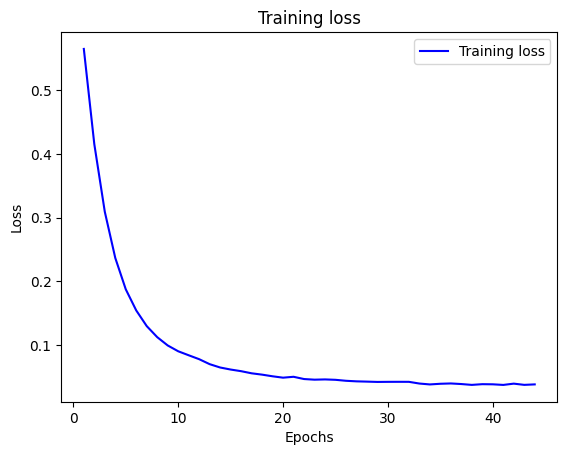

In [30]:
epochs = range(1, len(x_histry) + 1)

# Plot the loss values
plt.plot(epochs, x_histry, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
epoch_loss = 0
epoch_acc = 0
lstm.eval()
loss_history = []


model = LSTM(num_classes, input_size, hidden_size, num_layers, device)

model.load_state_dict(torch.load('save.pt'))
model.eval()  # 모델을 평가 모드로 설정합니다.
model.to(device)


with torch.no_grad():
    for i, (d, v) in enumerate(valid_data_loader):
        data = d
        v = v
        output_data = model(data)
        result = F.sigmoid(output_data)
        rounded_preds = torch.round(result)
        correct = (rounded_preds.flatten() == v)
        accuracy = correct.sum() / len(correct)
        print(f"{i}정확도 : {accuracy*100}%")
        loss = loss_function(result.reshape(-1, 1).to(torch.float32), v.reshape(-1, 1).to(torch.float32))
        loss_history.append(loss.item())
        epoch_loss += loss.item()

0정확도 : 84.375%
1정확도 : 90.625%
2정확도 : 95.3125%
3정확도 : 92.1875%
4정확도 : 85.9375%
5정확도 : 85.9375%
6정확도 : 87.5%
7정확도 : 87.5%
8정확도 : 92.1875%
9정확도 : 90.625%
10정확도 : 92.1875%
11정확도 : 87.5%
12정확도 : 90.625%
13정확도 : 92.1875%
14정확도 : 90.625%
15정확도 : 87.5%
16정확도 : 85.9375%
17정확도 : 82.8125%
18정확도 : 87.5%
19정확도 : 82.8125%
20정확도 : 78.125%
21정확도 : 84.375%
22정확도 : 82.8125%
23정확도 : 82.8125%
24정확도 : 85.9375%
25정확도 : 92.1875%
26정확도 : 87.5%
27정확도 : 90.625%
28정확도 : 87.5%
29정확도 : 84.375%
30정확도 : 90.625%
31정확도 : 89.0625%
32정확도 : 87.5%
33정확도 : 89.0625%
34정확도 : 84.375%
35정확도 : 82.8125%
36정확도 : 92.1875%
37정확도 : 85.9375%
38정확도 : 89.0625%
39정확도 : 87.5%
40정확도 : 85.9375%
41정확도 : 87.5%
42정확도 : 90.625%
43정확도 : 92.1875%
44정확도 : 89.0625%
45정확도 : 79.6875%
46정확도 : 84.375%
47정확도 : 76.5625%
48정확도 : 84.375%
49정확도 : 84.375%
50정확도 : 85.9375%
51정확도 : 93.75%
52정확도 : 89.0625%
53정확도 : 85.9375%
54정확도 : 90.625%
55정확도 : 87.5%
56정확도 : 90.625%
57정확도 : 84.375%
58정확도 : 90.625%
59정확도 : 92.1875%
60정확도 : 87.5%
61정확도 : 84.375%
62정확도 : 82.812